# Evaluating a classification model
Why?
To answer which model should we be using?
What parameters to use?


## Agenda

- What is the purpose of **model evaluation**, and what are some common evaluation procedures?
- What is the usage of **classification accuracy**, and what are its limitations?
- How does a **confusion matrix** describe the performance of a classifier?
- What **metrics** can be computed from a confusion matrix?
- How can you adjust classifier performance by **changing the classification threshold**?


## Review of model evaluation

- Need a way to choose between models: different model types, tuning parameters, and features
- Use a **model evaluation procedure** to estimate how well a model will generalize to out-of-sample data
- Requires a **model evaluation metric** to quantify the model performance

### Model evaluation procedures

1. **Training and testing on the same data**
    - Rewards overly complex models that "overfit" the training data and won't necessarily generalize
2. **Train/test split**
    - Split the dataset into two pieces, so that the model can be trained and tested on different data
    - Better estimate of out-of-sample performance, but still a "high variance" estimate
    - Useful due to its speed, simplicity, and flexibility
3. **K-fold cross-validation**
    - Systematically create "K" train/test splits and average the results together
    - Even better estimate of out-of-sample performance
    - Runs "K" times slower than train/test split

### Model evaluation metrics
Choice of metric will be based on business problem

- **Regression problems:** Mean Absolute Error, Mean Squared Error, Root Mean Squared Error
- **Classification problems:** Classification accuracy

## Classification accuracy



In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]

In [2]:
# Read in data and split data to be used in the models
titanic = pd.read_csv('https://raw.githubusercontent.com/learn-co-students/nyc-mhtn-ds-042219-lectures/master/Module_4/cleaned_titanic.csv', index_col='PassengerId')



In [3]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,youngin,male,Q,S
PassengerId,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,1,0,1
2,1,1,38.0,1,0,71.2833,0,0,0,0
3,1,3,26.0,0,0,7.9250,0,0,0,1
4,1,1,35.0,1,0,53.1000,0,0,0,1
5,0,3,35.0,0,0,8.0500,0,1,0,1


In [4]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,youngin,male,Q,S
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.019314,0.524184,0.382452,32.096681,0.069741,0.649044,0.086614,0.724409
std,0.486260,0.834700,13.209814,1.103705,0.806761,49.697504,0.254854,0.477538,0.281427,0.447063
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,1.000000
75%,1.000000,3.000000,36.500000,1.000000,0.000000,31.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000


Target Variable
Survived
0    549
1    340
Name: Survived, dtype: int64


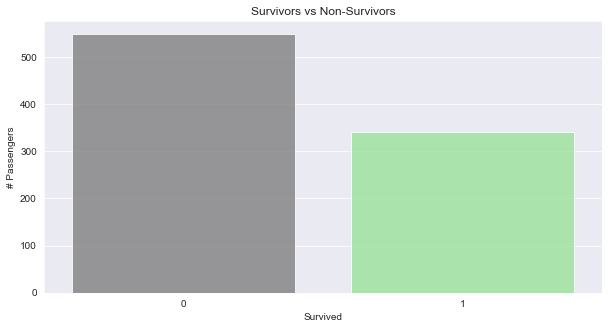

In [5]:
# Survival Count
print('Target Variable')
print(titanic.groupby(['Survived']).Survived.count())

# Target Variable Countplot
sns.set_style('darkgrid')
plt.figure(figsize = (10,5))
sns.countplot(titanic['Survived'], alpha =.80, palette= ['grey','lightgreen'])
plt.title('Survivors vs Non-Survivors')
plt.ylabel('# Passengers')
plt.show()

In [6]:
# Create matrix of features
X = titanic.drop('Survived', axis = 1) # grabs everything else but 'Survived'

# Create target variable
y = titanic['Survived'] # y is the column we're trying to predict

# Create a list of the features being used in the 
feature_cols = X.columns

In [7]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,youngin,male,Q,S
PassengerId,,,,,,,,,
1,3,22.0,1,0,7.2500,0,1,0,1
2,1,38.0,1,0,71.2833,0,0,0,0
3,3,26.0,0,0,7.9250,0,0,0,1
4,1,35.0,1,0,53.1000,0,0,0,1
5,3,35.0,0,0,8.0500,0,1,0,1


In [8]:
# Use x and y variables to split the training data into train and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [9]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
# when using the models... also think about why you are using this model.

LogisticRegression()

In [10]:
dictionary = dict(zip(list(X_train.columns), list(logreg.coef_[0])))

In [11]:
dictionary

{'Pclass': -0.7887100035475876,
 'Age': -0.009996652893857592,
 'SibSp': -0.4030026515050416,
 'Parch': -0.18306793406087116,
 'Fare': 0.007017819492329783,
 'youngin': 1.834634036867453,
 'male': -2.2410030887749675,
 'Q': -0.03719702361387333,
 'S': -0.4339100802792847}

In [12]:
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)

**Classification accuracy:** percentage of correct predictions

In [13]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))
#put the accuracy in context. If 82% survived and you are only 82% right, how comfortable ar eyou with this model.

0.820627802690583


**Null accuracy:** accuracy that could be achieved by always predicting the most frequent class

In [14]:
# examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

0    138
1     85
Name: Survived, dtype: int64

In [15]:
# calculate the percentage of ones
y_test.mean()

0.3811659192825112

In [16]:
# calculate the percentage of zeros
1 - y_test.mean()

0.6188340807174888

In [17]:
# calculate null accuracy (for binary classification problems coded as 0/1)
max(y_test.mean(), 1 - y_test.mean())

0.6188340807174888

Comparing the **true** and **predicted** response values

In [18]:
# print the first 25 true and predicted responses
print('True:', y_test.values[0:25])
print('Pred:', y_pred_class[0:25])
#make sure you understand what the 1 represents in your label

#accuracy does not tell you the type of errors, the underlying distribution...

True: [1 1 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1 1 0 1 1 0 0 0]
Pred: [1 1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 0 0 1]


**Conclusion:**

- Classification accuracy is the **easiest classification metric to understand**
- But, it does not tell you the **underlying distribution** of response values
- And, it does not tell you what **"types" of errors** your classifier is making

## Confusion matrix

Table that describes the performance of a classification model

<img src='images/cm_preggers.png' width=700/>


**Basic terminology**

- **True Positives (TP):** we *correctly* predicted that they *do* have diabetes
- **True Negatives (TN):** we *correctly* predicted that they *don't* have diabetes
- **False Positives (FP):** we *incorrectly* predicted that they *do* have diabetes (a "Type I error")
- **False Negatives (FN):** we *incorrectly* predicted that they *don't* have diabetes (a "Type II error")

In [19]:
# IMPORTANT: first argument is true values, second argument is predicted values
print(metrics.confusion_matrix(y_test, y_pred_class))

[[120  18]
 [ 22  63]]


In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_class)
classes = ['Perished', 'Survived']

In [21]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix, without normalization
[[120  18]
 [ 22  63]]


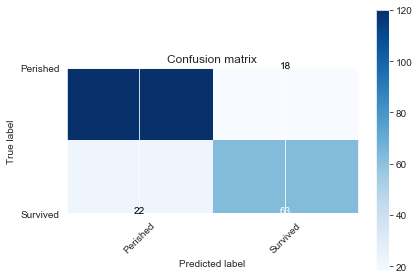

In [22]:
import itertools
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

- Every observation in the testing set is represented in **exactly one box**
- It's a 2x2 matrix because there are **2 response classes**
- The format shown here is **not** universal

In [23]:
# print the first 25 true and predicted responses
print('True:', y_test.values[0:25])
print('Pred:', y_pred_class[0:25])

#will have to decide what metric is most important to you.
#improving one metric with have a negative effect on the other.

True: [1 1 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1 1 0 1 1 0 0 0]
Pred: [1 1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 0 0 1]


In [24]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

## Metrics computed from a confusion matrix

The simplest metric we can use to evaluate our model is accuracy.

**Classification Accuracy:** Overall, how often is the classifier correct?

We can calculate the accuracy by dividing the number of correct classifications, by the number of observations in the test set. 

In [25]:
print((TP + TN) / float(TP + TN + FP + FN))

0.820627802690583


There is also a metric score in sklearn that does this for you. 

In [26]:


print(metrics.accuracy_score(y_test, y_pred_class))

0.820627802690583


This however is not always the best measure of a model's accuracy

***Question:*** Imagine your data looked similar to example below where you only had a few instances of the positive class. Why would accuracy be a bad measure of the model for this data?
*The distributiuon of the data affects the accuracy of your model. If you were predicting 0, you would be have a high accuracy rate.*

![alt text](images/imbalanced.png)

## Precision
When a positive value is predicted, how often is the prediction correct?

- How "precise" is the classifier when predicting positive instances?

***When the boy calls wolf, how often is there actually a wolf?***


$$\text{Precision} = \frac{TP}{TP+FP}$$

In [27]:
print(TP / float(TP + FP))
print(metrics.precision_score(y_test, y_pred_class))
#about 78% precise which is a little bit less than our accuracy. 
# This is predicting the positive class which is only 38% of the data distribution.
#Predicting a positive is that much harder.

0.7777777777777778
0.7777777777777778


## Recall (Sensitivity)

What proportion of actual positives was identified correctly?

***When the wolf comes around, how many times did the boy actually spot him?***


$$\text{Recall} = \frac{TP}{TP+FN}$$

Dividing by actually positive

When the actual value is positive, how often is the prediction correct?

- How "sensitive" is the classifier to detecting positive instances?
- Also known as "True Positive Rate" or "Recall"



In [28]:
print(TP / float(TP + FN))
print(metrics.recall_score(y_test, y_pred_class))

0.7411764705882353
0.7411764705882353


**Specificity:** When the actual value is negative, how often is the prediction correct?

Can also look at it as, 'How "specific" (or "selective") is the classifier in predicting positive instances?

In [29]:
print(TN / float(TN + FP))
# Prediction of neg class. Dominant class is negative class

0.8695652173913043


**False Positive Rate:** When the actual value is negative, how often is the prediction incorrect?

In [30]:
print(FP / float(TN + FP)) #(dividing by actually Negative)

0.13043478260869565


## F1 score 

The F1 score is the **harmonic average of the precision and recall**, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0.

*about the second most common metric after accuracy to us*

$$F1-Score = 2\ \frac{Precision\ x\ Recall}{Precision + Recall}$$



In [31]:
#calculating the F1 score
2*(metrics.precision_score(y_test, y_pred_class)*metrics.recall_score(y_test, y_pred_class))/(metrics.precision_score(y_test, y_pred_class)+metrics.recall_score(y_test, y_pred_class))

0.7590361445783134

![alt text](images/metricstable.png)

## General Guidance

*What is a worse error to have a FN or a FP. You could pick which error do you want to minimize, and use that as a metric. Or what do you want to optimize TN or TP. What is most important to the context of the problem? What is significant to the measure.*

Yes, **accuracy** is a great measure but only when you have symmetric datasets (false negatives & false positives counts are close), also, false negatives & false positives have similar costs.
If the cost of false positives and false negatives are different then F1 is your savior. F1 is best if you have an uneven class distribution.

**Precision** is how sure you are of your true positives whilst recall is how sure you are that you are not missing any positives.

Choose **Recall** <u>if the idea of false positives is far better than false negatives </u>, in other words, if the occurrence of false negatives is unaccepted/intolerable, that you’d rather get some extra false positives(false alarms) over saving some false negatives, like in our diabetes example.
You’d rather get some healthy people labeled diabetic over leaving a diabetic person labeled healthy.

Choose **precision** <u>if you want to be more confident of your true positives </u>. for example, Spam emails. You’d rather have some spam emails in your inbox rather than some regular emails in your spam box. So, the email company wants to be extra sure that email Y is spam before they put it in the spam box and you never get to see it.

Choose **Specificity** <u>if you want to cover all true negatives </u>, meaning you don’t want any false alarms, you don’t want any false positives. for example, you’re running a drug test in which all people who test positive will immediately go to jail, you don’t want anyone drug-free going to jail. False positives here are intolerable.

**Conclusion:**

- Confusion matrix gives you a **more complete picture** of how your classifier is performing
- Also allows you to compute various **classification metrics**, and these metrics can guide your model selection

**Which metrics should you focus on?**

- Choice of metric depends on your **business objective**
- **Spam filter** (positive class is "spam"): Optimize for **precision or specificity** because false negatives (spam goes to the inbox) are more acceptable than false positives (non-spam is caught by the spam filter)
- **Fraudulent transaction detector** (positive class is "fraud"): Optimize for **sensitivity** because false positives (normal transactions that are flagged as possible fraud) are more acceptable than false negatives (fraudulent transactions that are not detected)

## Adjusting the classification threshold
(an added option to adjusting or tuning hyperparameters ) Will change your predictions 

In [32]:
logreg.predict_proba(X_test)
# an array of proabilities, 28% chance of neg and 72% chance of positive

array([[0.2811983 , 0.7188017 ],
       [0.33032047, 0.66967953],
       [0.90441391, 0.09558609],
       [0.32968326, 0.67031674],
       [0.98226823, 0.01773177],
       [0.16580649, 0.83419351],
       [0.42370291, 0.57629709],
       [0.81002369, 0.18997631],
       [0.89030987, 0.10969013],
       [0.44666209, 0.55333791],
       [0.60371711, 0.39628289],
       [0.35645072, 0.64354928],
       [0.77425602, 0.22574398],
       [0.09225204, 0.90774796],
       [0.87943121, 0.12056879],
       [0.4335026 , 0.5664974 ],
       [0.857267  , 0.142733  ],
       [0.28935086, 0.71064914],
       [0.15603723, 0.84396277],
       [0.47937641, 0.52062359],
       [0.85144193, 0.14855807],
       [0.63306442, 0.36693558],
       [0.84120359, 0.15879641],
       [0.98173826, 0.01826174],
       [0.42928828, 0.57071172],
       [0.47106475, 0.52893525],
       [0.05877511, 0.94122489],
       [0.87950208, 0.12049792],
       [0.91313077, 0.08686923],
       [0.34753142, 0.65246858],
       [0.

In [33]:
THRESHOLD = 0.5
#think of threshold as the grading line
preds = np.where(logreg.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

pd.DataFrame(data=[metrics.accuracy_score(y_test, preds), metrics.recall_score(y_test, preds),
                   metrics.precision_score(y_test, preds), metrics.f1_score(y_test, preds)], 
             index=["accuracy", "recall", "precision", "F1"])

,0
accuracy,0.820628
recall,0.741176
precision,0.777778
F1,0.759036


In [34]:
THRESHOLD = 0.75
preds = np.where(logreg.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

pd.DataFrame(data=[metrics.accuracy_score(y_test, preds), metrics.recall_score(y_test, preds),
                   metrics.precision_score(y_test, preds), metrics.f1_score(y_test, preds)], 
             index=["accuracy", "recall", "precision", "F1"])

,0
accuracy,0.762332
recall,0.400000
precision,0.944444
F1,0.561983


*By increasing our threshold, our accuracy went down. We missed about 6% more instances but now when we say that someone is surviving, we are right 94% of the time, where our precision went up by a lot. Our recall decreased by a lot. and our F1 decreased. 
Precision up = up the threshold for positive clas
Precision up = decrease recall*

### Precision and Recall: A Tug of War
To fully evaluate the effectiveness of a model, you must examine both precision and recall. Unfortunately, precision and recall are often in tension. That is, improving precision typically reduces recall and vice versa. Explore this notion by looking at the following figure.

<img src='images/PrecisionVsRecallBase.svg' width=900/>

In order to map a logistic regression value to a binary category, you must define a classification threshold (also called the decision threshold). A value above that threshold indicates "spam"; a value below indicates "not spam." It is tempting to assume that the classification threshold should always be 0.5, but thresholds are problem-dependent, and are therefore values that you must tune.


"Tuning" a threshold for logistic regression is different from tuning hyperparameters such as learning rate

Those to the right of the classification threshold are classified as "spam", while those to the left are classified as "not spam."

![alt text](images/Exam_pass_logistic_curve.jpeg)

In [35]:
# print the first 10 predicted responses
logreg.predict(X_test)[0:10]

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 1])

In [36]:
# print the first 10 predicted probabilities of class membership
logreg.predict_proba(X_test)[0:10, :]

array([[0.2811983 , 0.7188017 ],
       [0.33032047, 0.66967953],
       [0.90441391, 0.09558609],
       [0.32968326, 0.67031674],
       [0.98226823, 0.01773177],
       [0.16580649, 0.83419351],
       [0.42370291, 0.57629709],
       [0.81002369, 0.18997631],
       [0.89030987, 0.10969013],
       [0.44666209, 0.55333791]])

In [37]:
# print the first 10 predicted probabilities for class 1
logreg.predict_proba(X_test)[0:10, 1]

array([0.7188017 , 0.66967953, 0.09558609, 0.67031674, 0.01773177,
       0.83419351, 0.57629709, 0.18997631, 0.10969013, 0.55333791])

In [38]:
# store the predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

In [39]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

Text(0, 0.5, 'Frequency')

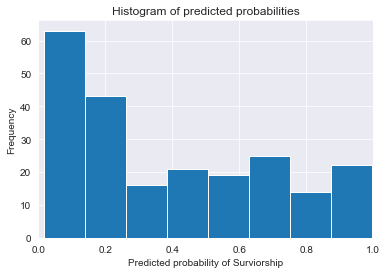

In [40]:
# histogram of predicted probabilities
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of Surviorship')
plt.ylabel('Frequency')

**Decrease the threshold** for predicting diabetes in order to **increase the sensitivity** of the classifier

In [41]:
# predict diabetes if the predicted probability is greater than 0.3
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], 0.3)[0]

In [42]:
# print the first 10 predicted probabilities
y_pred_prob[0:10]

array([0.7188017 , 0.66967953, 0.09558609, 0.67031674, 0.01773177,
       0.83419351, 0.57629709, 0.18997631, 0.10969013, 0.55333791])

In [43]:
# print the first 10 predicted classes with the lower threshold
y_pred_class[0:10]

array([1., 1., 0., 1., 0., 1., 1., 0., 0., 1.])

Confusion Matrix, without normalization
[[120  18]
 [ 22  63]]


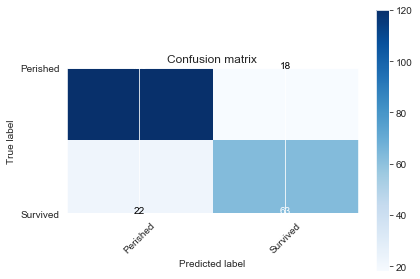

In [44]:
# previous confusion matrix (default threshold of 0.5)

plot_confusion_matrix(confusion, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [45]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[99, 39],
       [ 9, 76]])

Confusion Matrix, without normalization
[[99 39]
 [ 9 76]]


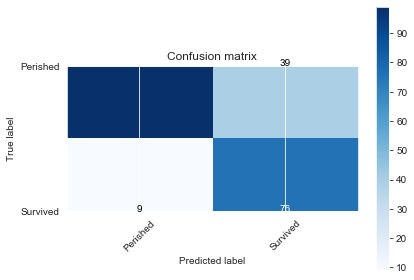

In [46]:
# new confusion matrix (threshold of 0.3)
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_pred_class), classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

**Conclusion:**

- **Threshold of 0.5** is used by default (for binary problems) to convert predicted probabilities into class predictions
- Threshold can be **adjusted** to increase sensitivity or specificity
- Sensitivity and specificity have an **inverse relationship**

## Confusion Matrix Resources

- Blog post: [Simple guide to confusion matrix terminology](http://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/) by me
- Videos: [Intuitive sensitivity and specificity](https://www.youtube.com/watch?v=U4_3fditnWg) (9 minutes) and [The tradeoff between sensitivity and specificity](https://www.youtube.com/watch?v=vtYDyGGeQyo) (13 minutes) by Rahul Patwari
- Notebook: [How to calculate "expected value"](https://github.com/podopie/DAT18NYC/blob/master/classes/13-expected_value_cost_benefit_analysis.ipynb) from a confusion matrix by treating it as a cost-benefit matrix (by Ed Podojil)
- Graphic: How [classification threshold](https://media.amazonwebservices.com/blog/2015/ml_adjust_model_1.png) affects different evaluation metrics (from a [blog post](https://aws.amazon.com/blogs/aws/amazon-machine-learning-make-data-driven-decisions-at-scale/) about Amazon Machine Learning)




## Other Resources

- scikit-learn documentation: [Model evaluation](http://scikit-learn.org/stable/modules/model_evaluation.html)
- Guide: [Comparing model evaluation procedures and metrics](https://github.com/justmarkham/DAT8/blob/master/other/model_evaluation_comparison.md) by me
- Video: [Counterfactual evaluation of machine learning models](https://www.youtube.com/watch?v=QWCSxAKR-h0) (45 minutes) about how Stripe evaluates its fraud detection model, including [slides](http://www.slideshare.net/MichaelManapat/counterfactual-evaluation-of-machine-learning-models)